In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

• Korak 1.1: Učitajte dataset pomoću Pythona koristeći biblioteku pandas.

• Korak 1.2: Pregledajte osnovne informacije o datasetu:

o Broj redaka i stupaca (što predstavljaju).

o Provjerite tipove podataka (numerički, kategorijski).

o Provjerite ima li dataset nedostajuće vrijednosti koristeći isnull().

In [ ]:
data = pd.read_csv('/content/sample_data/glass.csv')
print(data.head())
print(data.info())
print(data.isnull())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
     

• Korak 2.1: Prikazati i interpretirati osnovne statistike za odabrane (barem 3) varijable:
o Srednju vrijednost, standardnu devijaciju, minimalnu i maksimalnu vrijednost za
svaku varijablu.

• Korak 2.2: Vizualizirati podatke:
o Boxplot za zavisnu varijablu (npr. SiO2) po kategorijama (Type of glass).
o Histogram za razdiobu zavisne varijable.

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


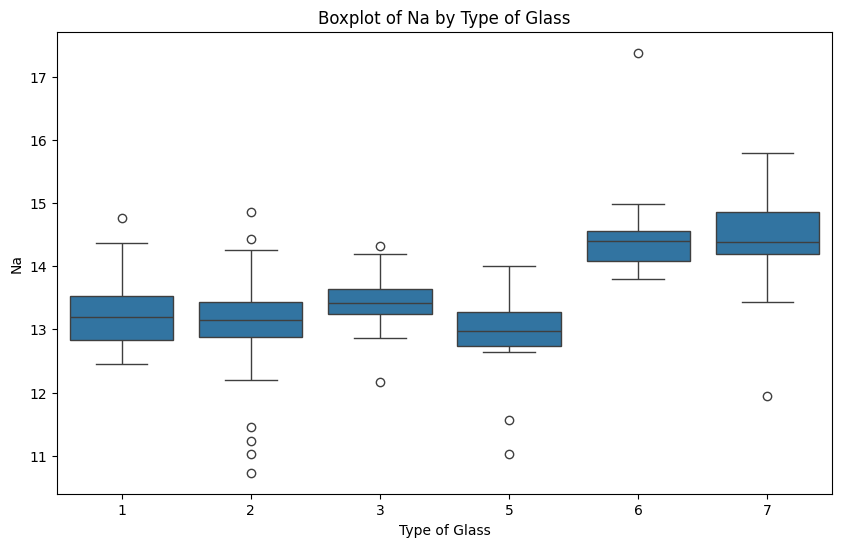

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Type', y='Na')
plt.title('Boxplot of Na by Type of Glass')
plt.xlabel('Type of Glass')
plt.ylabel('Na')
plt.show()

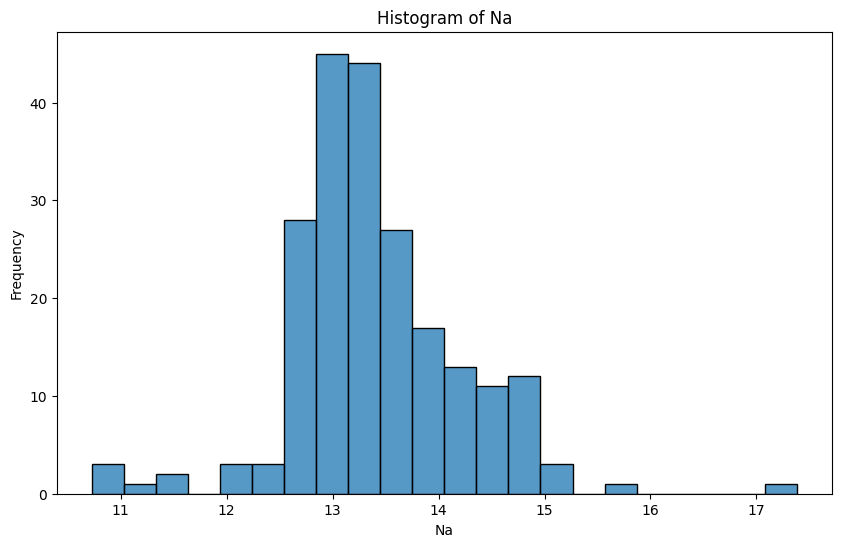

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Na')
plt.title('Histogram of Na')
plt.xlabel('Na')
plt.ylabel('Frequency')
plt.show()

• Korak 3.1: Provjera pretpostavki ANOVA analize:

o Normalnost podataka: Koristite Shapiro-Wilk test (scipy.stats.shapiro).

o Homoscedastičnost (jednakost varijanci):
Koristite Leveneov test (scipy.stats.levene).

• Korak 3.2: Ako pretpostavke nisu zadovoljene, predložite odgovarajuće transformacije
podataka (log-transformacija ili drugi pristupi).

In [ ]:
shapiro_stat, shapiro_p = stats.shapiro(data['Na'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.7f}")

shapiro_stat, shapiro_p = stats.shapiro(data['Mg'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.7f}")

shapiro_stat, shapiro_p = stats.shapiro(data['Si'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.7f}")

Shapiro-Wilk test: stat=0.946, p=0.0000003
Shapiro-Wilk test: stat=0.699, p=0.0000000
Shapiro-Wilk test: stat=0.920, p=0.0000000


In [ ]:
stats.levene(data[data['Type'] == 1]['Na'], data[data['Type'] == 2]['Mg'], data[data['Type'] == 3]['Si'])

LeveneResult(statistic=2.498179161616074, pvalue=0.08543776930847242)

Normalnost podataka nije zadovoljena:

Podaci zahtijevaju transformaciju (npr. log-transformaciju ili kvadratni korijen).
Homoscedastičnost je zadovoljena:

Možemo koristiti ANOVA analizu nakon što se podaci transformiraju kako bi zadovoljili pretpostavku normalnosti.

In [ ]:
data['Na'] = np.sqrt(data['Na'])
data['Mg'] = np.sqrt(data['Mg'])
data['Si'] = np.sqrt(data['Si'])

In [ ]:
shapiro_stat, shapiro_p = stats.shapiro(data['Na'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.7f}")

shapiro_stat, shapiro_p = stats.shapiro(data['Mg'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.7f}")

shapiro_stat, shapiro_p = stats.shapiro(data['Si'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.7f}")

Shapiro-Wilk test: stat=0.949, p=0.0000007
Shapiro-Wilk test: stat=0.622, p=0.0000000
Shapiro-Wilk test: stat=0.918, p=0.0000000


 Korak 4.1: Jednosmjerna ANOVA analiza:

o Koristite funkciju f_oneway iz scipy.stats za usporedbu zavisne varijable
među skupinama.

o Prikažite F-statistiku i p-vrijednost.

• Korak 4.2: Provedite post hoc test (npr. Tukey HSD) za dodatnu analizu ako su razlike
značajne (statsmodels.stats.multicomp.pairwise_tukeyhsd).

In [ ]:
# Alternativna ANOVA analiza pomoću scipy
f_val, p_val = stats.f_oneway(data['Na'], data['Mg'], data['Si'])
print("\nScipy ANOVA rezultati:")
print(f"F-vrijednost: {f_val:.2f}, p-vrijednost: {p_val:.4f}")


Scipy ANOVA rezultati:
F-vrijednost: 14691.23, p-vrijednost: 0.0000


In [ ]:
# Stvaranje DataFramea
data_for_anova = pd.DataFrame({
    'Vrijednosti': np.concatenate([data['Na'], data['Mg'], data['Si']]), # Use a list within np.concatenate to combine the columns
    'Grupa': ['Na'] * len(data) + ['Mg'] * len(data) + ['Si'] * len(data)  # Repeat group names for each element
})

In [ ]:
# Post-hoc analiza - Tukeyev HSD test
tukey = pairwise_tukeyhsd(data_for_anova['Vrijednosti'], data_for_anova['Grupa'], alpha=0.05)
print("\nTukeyev HSD test:")
print(tukey)


Tukeyev HSD test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    Mg     Na   2.2003   0.0 2.1013 2.2994   True
    Mg     Si   7.0638   0.0 6.9647 7.1628   True
    Na     Si   4.8634   0.0 4.7644 4.9625   True
-------------------------------------------------
